# Modelos de aprendizaje supervisado para el dignostico de diabetes

## instalamos las librerias a usar

In [252]:
! pip install numpy matplotlib pandas seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


###  Importamos las librerias a usar

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from DataTransformer import DataTransformer
from sklearn.metrics import confusion_matrix,precision_score,recall_score,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from Model import Model
import pickle as pk

In [2]:
#leemos el dataset con pandas
df_diabetes_train=pd.read_csv('./DataSet/Diabetes_Dataset_train.csv',delimiter=";")
df_diabetes_test=pd.read_csv('./DataSet/Diabetes_Dataset_test.csv',delimiter=";")

df_diabetes_train.head()#mostramos una parte del data frame
df_diabetes_train=df_diabetes_train.dropna()
df_diabetes_test=df_diabetes_test.dropna()



# CLASES GLOBALES

In [3]:
data_trf=DataTransformer()

In [4]:
# obtenemos informacion del dataset, verificamos si hay datos vacio que arruinaran el analisis
df_diabetes_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  700 non-null    object 
 1   AGE     700 non-null    int64  
 2   Urea    700 non-null    float64
 3   Cr      700 non-null    int64  
 4   HbA1c   700 non-null    float64
 5   Chol    700 non-null    float64
 6   TG      700 non-null    float64
 7   HDL     700 non-null    float64
 8   LDL     700 non-null    float64
 9   VLDL    700 non-null    float64
 10  BMI     700 non-null    float64
 11  CLASS   700 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 65.8+ KB


In [5]:
df_diabetes_train.min()

Gender       F
AGE         20
Urea       0.5
Cr          20
HbA1c      0.9
Chol       0.0
TG         0.3
HDL        0.2
LDL        0.3
VLDL       0.1
BMI       19.0
CLASS        N
dtype: object

In [6]:
df_diabetes_train.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 900x500 with 0 Axes>

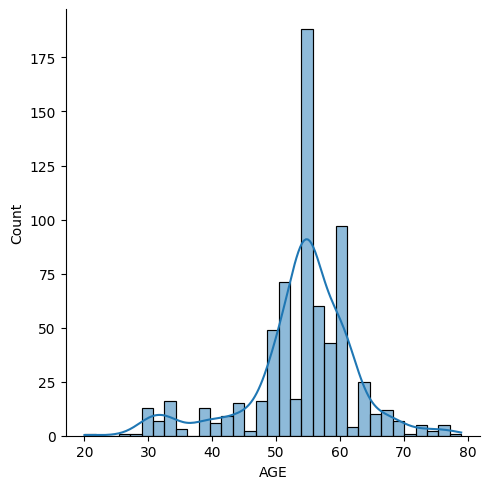

In [7]:
# graficamos el genero
plt.figure(figsize=(9,5))
ax=sns.displot(df_diabetes_train.AGE,kde=True,stat="count")

C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='Gender', ylabel='Count'>

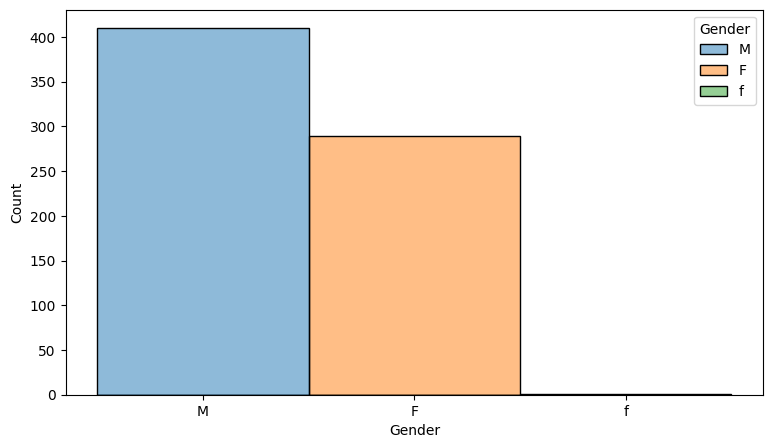

In [8]:
# grafica de barras de genero
plt.figure(figsize=(9,5))
sns.histplot(data=df_diabetes_train,x="Gender",hue="Gender")
#observamos que hay un dato que no sigue el formato de femenino porlo tanto lo arreglaremos

In [9]:
def setGenero(df):
    df.loc[df["Gender"]=="f","Gender"]="F"
    

C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='Gender', ylabel='Count'>

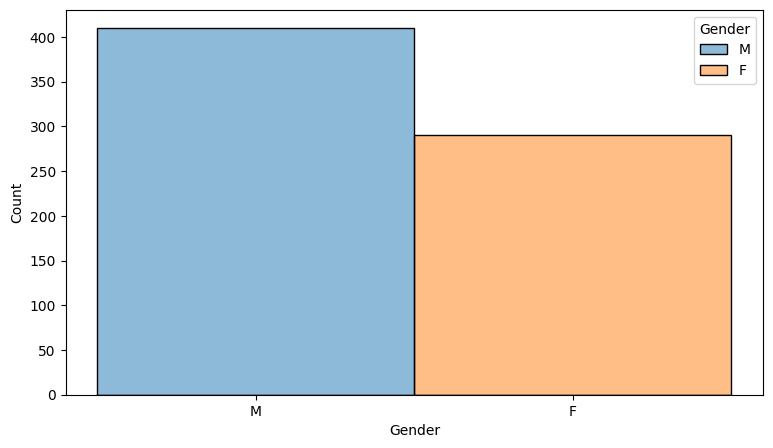

In [10]:

setGenero(df_diabetes_train)
setGenero(df_diabetes_test)
plt.figure(figsize=(9,5))
sns.histplot(data=df_diabetes_train,x="Gender",hue="Gender")

C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='CLASS', ylabel='Count'>

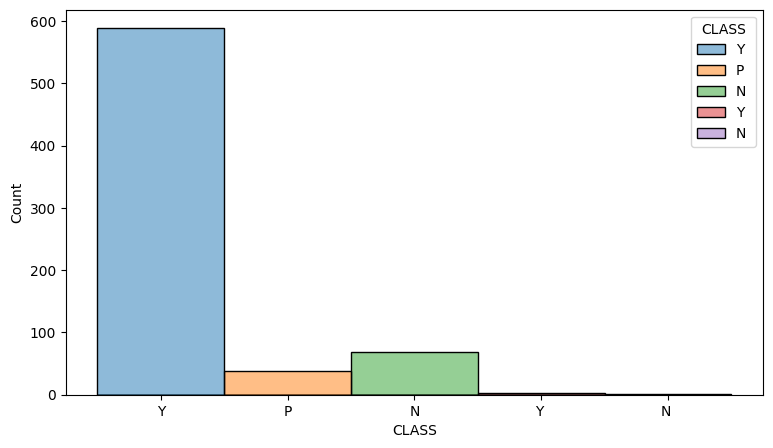

In [11]:
# grafica de barras del diagnostico
plt.figure(figsize=(9,5))
sns.histplot(data=df_diabetes_train,x="CLASS",hue="CLASS")
# vemos que de la misma manera tenemos problemas con los valores

In [12]:
def setClass(df):
    df.loc[df["CLASS"]=="Y ","CLASS"]="Y"
    df.loc[df["CLASS"]=="N ","CLASS"]="N"

C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='CLASS', ylabel='Count'>

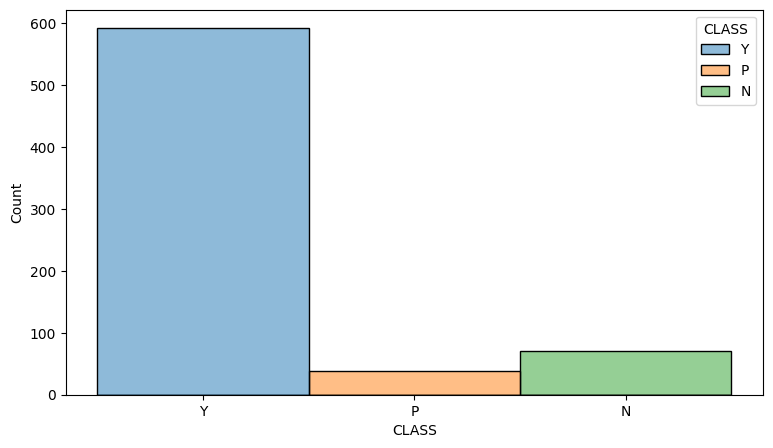

In [13]:
setClass(df_diabetes_train)
setClass(df_diabetes_test)
plt.figure(figsize=(9,5))
sns.histplot(data=df_diabetes_train,x="CLASS",hue="CLASS")

In [14]:
df_diabetes_train.CLASS.value_counts()

CLASS
Y    592
N     70
P     38
Name: count, dtype: int64

# Variables caracteristicas

In [15]:
df_diabetes_train.CLASS.value_counts().index

Index(['Y', 'N', 'P'], dtype='object', name='CLASS')

C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sebastian\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


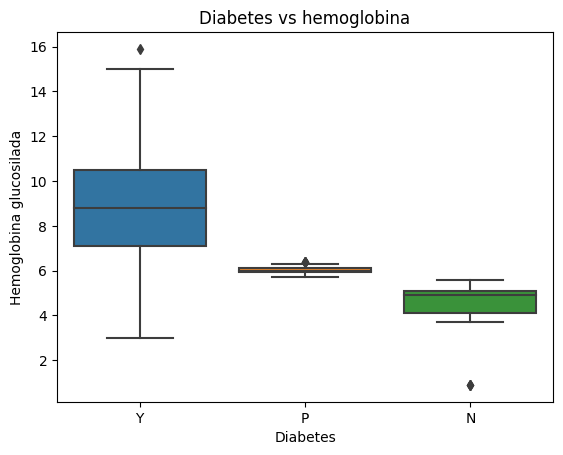

In [16]:
sns.boxplot(x="CLASS", y="HbA1c", data=df_diabetes_train)
plt.xlabel("Diabetes")
plt.ylabel("Hemoglobina glucosilada")
plt.title("Diabetes vs hemoglobina")
plt.show()

In [17]:
df_diabetes_train=df_diabetes_train[["Gender","AGE","HbA1c","Chol","TG","VLDL","BMI","CLASS"]]
df_diabetes_test=df_diabetes_test[["Gender","AGE","HbA1c","Chol","TG","VLDL","BMI","CLASS"]]

# Normalizacion y Codificacion Ordinal

In [18]:
df_diabetes_train=data_trf.codificacionOrdinal(df_diabetes_train)
df_diabetes_test=data_trf.codificacionOrdinal(df_diabetes_test)



In [19]:
df_diabetes_train.head()

,AGE,HbA1c,Chol,TG,VLDL,BMI,Gender,CLASS
0,54,7.3,3.6,1.7,0.7,29.0,1.0,2.0
1,60,7.1,4.6,1.6,1.7,26.0,1.0,2.0
2,60,8.8,4.5,2.2,1.1,34.0,1.0,2.0
3,39,6.4,3.7,2.0,0.9,19.5,1.0,1.0
4,60,10.4,9.9,3.5,1.5,31.0,1.0,2.0


In [20]:
X_train=df_diabetes_train.iloc[:,:-1]
y_train=df_diabetes_train.iloc[:,-1]
X_test=df_diabetes_test.iloc[:,:-1]
y_test=df_diabetes_test.iloc[:,-1]


In [21]:
X_train=data_trf.normalizar(X_train)
X_test=data_trf.normalizar(X_test)

In [22]:
X_train

,AGE,HbA1c,Chol,TG,VLDL,BMI,Gender
0,-0.004405,-0.392066,-0.982038,-0.435345,-0.316449,-0.173796,1.0
1,0.707142,-0.470367,-0.220194,-0.507284,-0.074039,-0.772454,1.0
2,0.707142,0.195194,-0.296379,-0.075649,-0.219485,0.823967,1.0
3,-1.783271,-0.744422,-0.905853,-0.219527,-0.267967,-2.069546,1.0
4,0.707142,0.821605,3.817575,0.859560,-0.122521,0.225309,1.0
...,...,...,...,...,...,...,...
695,-0.360178,0.273495,0.998755,-0.579223,-0.122521,1.023520,1.0
696,0.232777,-0.548669,-0.524932,0.212107,-0.122521,0.225309,1.0
697,0.707142,0.273495,-0.372563,-0.219527,-0.267967,-0.572901,1.0
698,-1.190315,-1.096778,3.512837,-0.435345,-0.340690,-1.770217,0.0


# MODELOS

In [23]:
models =[("Regresion Logistica", LogisticRegression(random_state=42)),
         ("Vectores de soporte de maquina", SVC(random_state=42)),
         ("Arbol de decision", DecisionTreeClassifier(random_state=42)),
         ('Bosque aleatorio',RandomForestClassifier(random_state=42)),
        ]

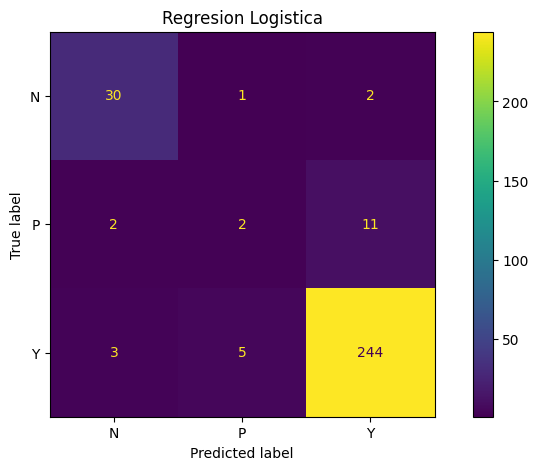

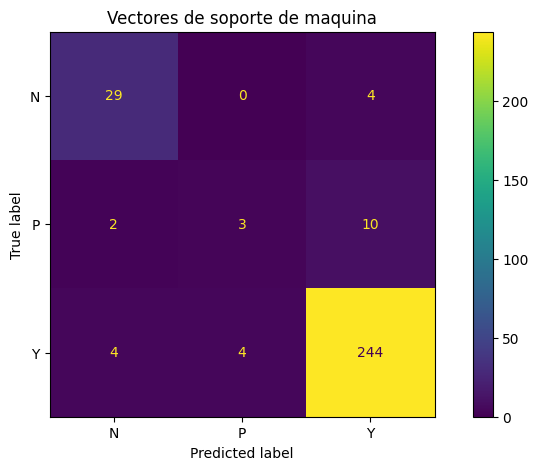

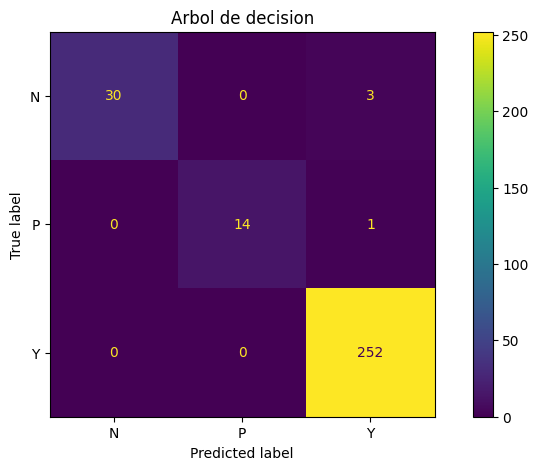

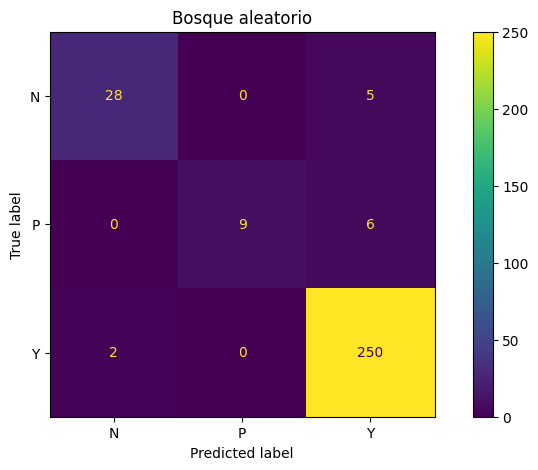

In [24]:
finalResults = []
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test,y_pred,average='macro')
    recall=recall_score(y_test,y_pred,average='macro')
    cm=confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=data_trf.get_categories[1])
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(name)
    disp.plot(ax=ax)
    finalResults.append({'nombreModelo':name,'precision':precision,'recall':recall})


In [25]:
modelo=models[2][1]

In [26]:
modelo

DecisionTreeClassifier(random_state=42)

In [27]:
finalResults

[{'nombreModelo': 'Regresion Logistica',
  'precision': 0.9042954419121734,
  'recall': 0.92},
 {'nombreModelo': 'Vectores de soporte de maquina',
  'precision': 0.9069900332225914,
  'recall': 0.92},
 {'nombreModelo': 'Arbol de decision',
  'precision': 0.986875,
  'recall': 0.9866666666666667},
 {'nombreModelo': 'Bosque aleatorio',
  'precision': 0.9572643678160919,
  'recall': 0.9566666666666667}]

In [29]:
finalResults

,nombreModelo,precision,recall
0,Regresion Logistica,0.904295,0.920000
1,Vectores de soporte de maquina,0.906990,0.920000
2,Arbol de decision,0.986875,0.986667
3,Bosque aleatorio,0.957264,0.956667


In [28]:
finalResults=pd.DataFrame(finalResults)

In [30]:
finalResults.sort_values(by="recall",ascending=False)


,nombreModelo,precision,recall
2,Arbol de decision,0.986875,0.986667
3,Bosque aleatorio,0.957264,0.956667
0,Regresion Logistica,0.904295,0.920000
1,Vectores de soporte de maquina,0.906990,0.920000


In [31]:
X_train

,AGE,HbA1c,Chol,TG,VLDL,BMI,Gender
0,-0.004405,-0.392066,-0.982038,-0.435345,-0.316449,-0.173796,1.0
1,0.707142,-0.470367,-0.220194,-0.507284,-0.074039,-0.772454,1.0
2,0.707142,0.195194,-0.296379,-0.075649,-0.219485,0.823967,1.0
3,-1.783271,-0.744422,-0.905853,-0.219527,-0.267967,-2.069546,1.0
4,0.707142,0.821605,3.817575,0.859560,-0.122521,0.225309,1.0
...,...,...,...,...,...,...,...
695,-0.360178,0.273495,0.998755,-0.579223,-0.122521,1.023520,1.0
696,0.232777,-0.548669,-0.524932,0.212107,-0.122521,0.225309,1.0
697,0.707142,0.273495,-0.372563,-0.219527,-0.267967,-0.572901,1.0
698,-1.190315,-1.096778,3.512837,-0.435345,-0.340690,-1.770217,0.0


In [32]:
modelSlc=Model(models[2][1],data_trf)

In [1]:
datos_prediccion = {
    'AGE': [39],
    'HbA1c': [10.1],
    'Chol': [10.6752],
    'TG': [9.174],
    'VLDL': [1.8348],
    'BMI': [32],
    'Gender': ['M'],
    'CLASS':'N'
}

In [2]:
datos_prediccion["AGE"].append(13)

In [3]:
datos_prediccion

{'AGE': [39, 13],
 'HbA1c': [10.1],
 'Chol': [10.6752],
 'TG': [9.174],
 'VLDL': [1.8348],
 'BMI': [32],
 'Gender': ['M'],
 'CLASS': 'N'}

In [33]:
datos_prediccion = {
    'AGE': [39],
    'HbA1c': [10.1],
    'Chol': [10.6752],
    'TG': [9.174],
    'VLDL': [1.8348],
    'BMI': [32],
    'Gender': ['M'],
    'CLASS':'N'
}

respuesta=modelSlc.predict(pd.DataFrame(datos_prediccion))
print(respuesta)

['Y']


In [34]:
pk.dump(modelSlc,open("./modelo.pkl", "wb"))